In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances

data = np.load("data.npy")

Nous allons utiliser la méthode Elbow afin d'obtenir le nombre potentiel de cluster :

/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kme

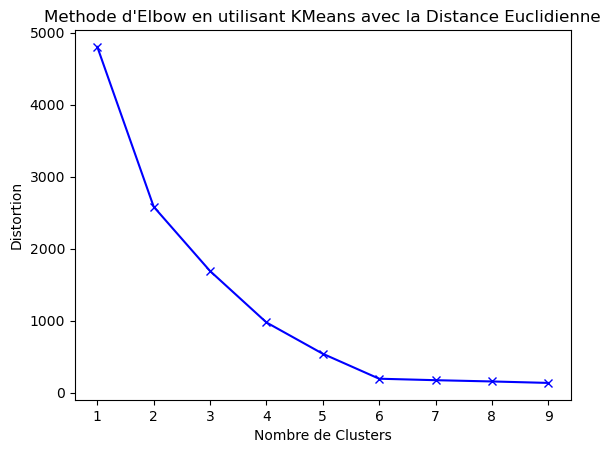

Le nombre optimal de cluster avec la methode d'Elbow est: 6


In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Distortion')
plt.title("Methode d'Elbow en utilisant KMeans avec la Distance Euclidienne")
plt.show()

slope = np.diff(distortions)

elbow_point = np.argmax(slope)
print("Le nombre optimal de cluster avec la methode d'Elbow est:", elbow_point)


/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kme

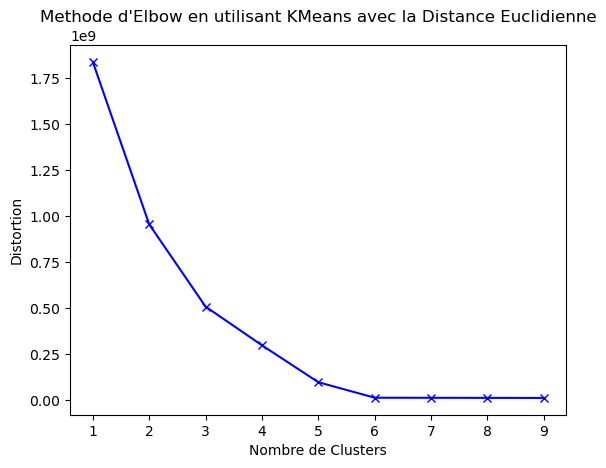

Le nombre optimal de cluster avec la methode d'Elbow est: 6


In [26]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Distortion')
plt.title("Methode d'Elbow en utilisant KMeans avec la Distance Euclidienne")
plt.show()

slope = np.diff(distortions)

elbow_point = np.argmax(slope) - 1
print("Le nombre optimal de cluster avec la methode d'Elbow est:", elbow_point)


Le résultat reste robuste.

Afin de verifier ce résultat nous pouvons utiliser la méthode de Silhouette score :

/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kme

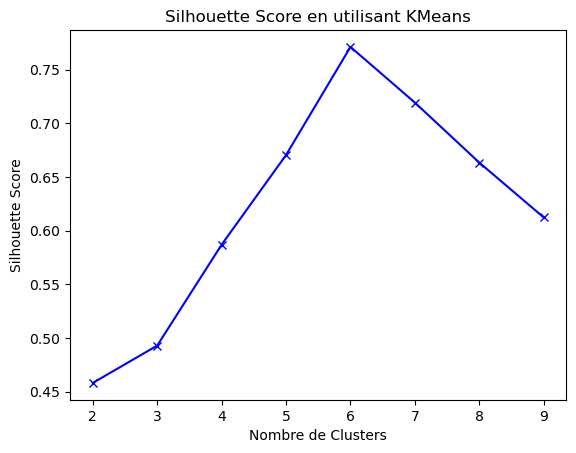

Le nombre optimal de clusters determiné par la methode de Silhouette Score est: 6


In [22]:
K = range(2, 10)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score en utilisant KMeans')
plt.show()

optimal_num_clusters = K[np.argmax(silhouette_scores)]
print('Le nombre optimal de clusters determiné par la methode de Silhouette Score est:', optimal_num_clusters)


/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kme

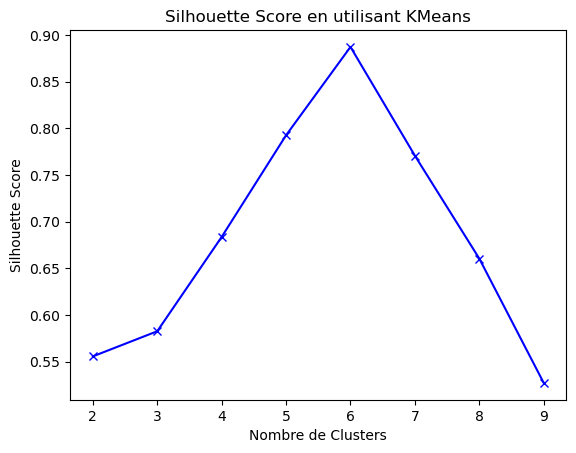

Le nombre optimal de clusters determiné par la methode de Silhouette Score est: 6


In [23]:
K = range(2, 10)

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score en utilisant KMeans')
plt.show()

optimal_num_clusters = K[np.argmax(silhouette_scores)]
print('Le nombre optimal de clusters determiné par la methode de Silhouette Score est:', optimal_num_clusters)


Le résultat reste robuste

Nous allons maintenant essayer de tester ces résultats graphiquement afin de vérifier nos résultats précédents.
Tout d'abord nous allons alimenter la méthode de K-means avec la similarité cosinus afin de regrouper des données en fonction de la similarité directionnelle.
Nous obtenons ce rendu :

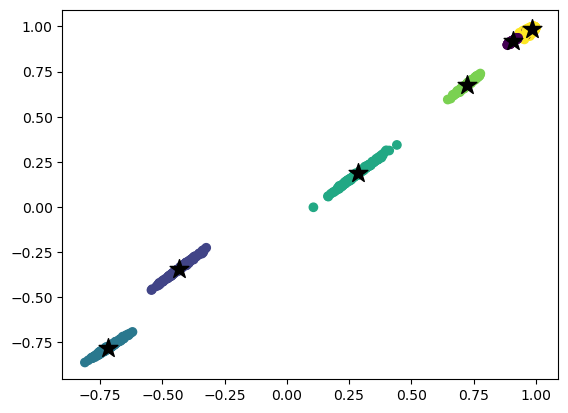

In [5]:
def cosine_similarity(x, y):
    return 1 - pairwise_distances(x, y, metric='cosine')


D = cosine_similarity(data, data)

clustering = KMeans(n_clusters=6, n_init=10).fit_predict(D)
cluster_centroids = KMeans(n_clusters=6, n_init=10).fit(D).cluster_centers_

plt.scatter(D[:, 0], D[:, 1], c=clustering)
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='*', s=200, c='black')
plt.show()


On peut en déduire que la méthode n'est pas très précise car les deux derniers clusters sont très proche nous pouvons les confondre. Ça ne suffit pas à justifier les résultats précédents.

/Users/valentinozveri/anaconda3/envs/MCLR/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


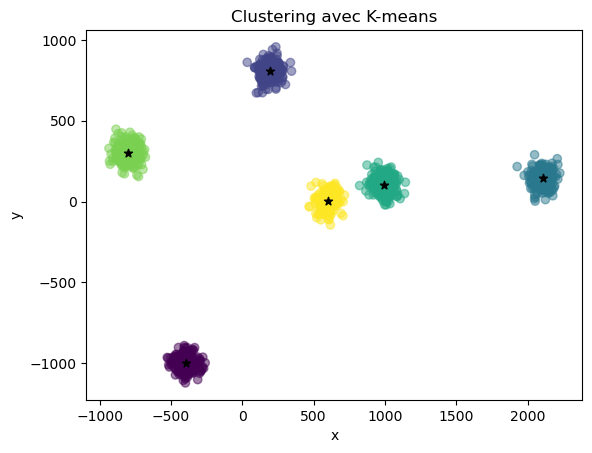

In [6]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
centres_clusters = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centres_clusters[:, 0], centres_clusters[:, 1], c='black', marker='*')
plt.title('Clustering avec K-means')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Nous obtenons bien 6 clusters bien séparer, ça justifie bien les résultats précédemment reçu.